<a href="https://www.kaggle.com/code/sanskarbhushankar/dynamic-pricing-sanskar?scriptVersionId=201697865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA on Dynamic Pricing 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


/kaggle/input/dynamic-pricing-dataset/dynamic_pricing.csv


**Import the DataSet**

In [2]:
data = pd.read_csv("/kaggle/input/dynamic-pricing-dataset/dynamic_pricing.csv")
print(data.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [3]:
print(data.columns)
print(data.head())

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular   

# EXPLORATORY DATA ANALYSIS

In [4]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


# Data Dictionary

In [5]:
def data_info(data):
  data_dict=pd.DataFrame(columns=["column","count","unique_values","Range","Null Values","Possible Values"])
  for col in data.columns:
    count=data[col].shape[0]
    unique_values=data[col].nunique()
    if unique_values>1:
      range=f"{data[col].min()}-{data[col].max()}"
    else:
      range=np.nan
    null_values=data[col].isnull().sum()
    possible_values=list(data[col].sample(frac=0.25,replace=False,random_state=42).unique())
    if len(possible_values)>10:
      possible_values=possible_values[:6]
    data_dict.loc[len(data_dict.index)]=[col,count,unique_values,range,null_values,possible_values]
  return data_dict

data_info(data)

,column,count,unique_values,Range,Null Values,Possible Values
0,Number_of_Riders,1000,81,20-100,0,"[38, 83, 22, 29, 91, 68]"
1,Number_of_Drivers,1000,79,5-89,0,"[8, 18, 7, 13, 14, 23]"
2,Location_Category,1000,3,Rural-Urban,0,"[Urban, Suburban, Rural]"
3,Customer_Loyalty_Status,1000,3,Gold-Silver,0,"[Silver, Gold, Regular]"
4,Number_of_Past_Rides,1000,101,0-100,0,"[78, 12, 15, 44, 19, 96]"
5,Average_Ratings,1000,151,3.5-5.0,0,"[3.57, 4.98, 3.53, 4.29, 4.78, 4.77]"
6,Time_of_Booking,1000,4,Afternoon-Night,0,"[Night, Morning, Evening, Afternoon]"
7,Vehicle_Type,1000,2,Economy-Premium,0,"[Economy, Premium]"
8,Expected_Ride_Duration,1000,171,10-180,0,"[114, 81, 180, 87, 19, 105]"
9,Historical_Cost_of_Ride,1000,1000,25.993449448411635-836.1164185613576,0,"[470.2690237026412, 286.409294385432, 552.2693..."


In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB
None


**Rider VS Driver comparision based on location**

In [7]:
rider_driver_counts = data.groupby('Location_Category').agg({'Number_of_Riders': 'sum', 'Number_of_Drivers': 'sum'})

fig = go.Figure(data=[
    go.Bar(name='Riders', x=rider_driver_counts.index, y=rider_driver_counts['Number_of_Riders']),
    go.Bar(name='Drivers', x=rider_driver_counts.index, y=rider_driver_counts['Number_of_Drivers'])
])

fig.update_layout(barmode='group',
                  title='Comparison of Riders and Drivers in Different Locations',
                  xaxis_title='Location Category',
                  yaxis_title='Number of Riders/Drivers')

**Driver to Rider Ratio for each loaction category**

In [8]:
rider_driver_ratio = data.groupby('Location_Category').agg({'Number_of_Riders': 'sum', 'Number_of_Drivers': 'sum'})
rider_driver_ratio['Rider_Driver_Ratio'] = rider_driver_ratio['Number_of_Riders'] / rider_driver_ratio['Number_of_Drivers']

print(rider_driver_ratio)
overall_rider_driver_ratio = data['Number_of_Riders'].sum() / data['Number_of_Drivers'].sum()

print("\nOverall Average Rider-to-Driver Ratio:", overall_rider_driver_ratio)


                   Number_of_Riders  Number_of_Drivers  Rider_Driver_Ratio
Location_Category                                                         
Rural                         19242               8250            2.332364
Suburban                      20056               9179            2.184987
Urban                         21074               9647            2.184513

Overall Average Rider-to-Driver Ratio: 2.2297237405820653


**Riders Demand Time for each loaction category**

In [9]:
ride_counts_by_location_time = data.groupby(['Location_Category', 'Time_of_Booking'])['Number_of_Riders'].sum().unstack()
max_rides_time_by_location = ride_counts_by_location_time.idxmax(axis=1)

print("Max Time of booking for each Location",max_rides_time_by_location)

Max Time of booking for each Location Location_Category
Rural         Night
Suburban    Morning
Urban         Night
dtype: object


**For Each Loyalty Status**

In [10]:
ride_demand_by_time = data.groupby(['Time_of_Booking','Customer_Loyalty_Status'])['Number_of_Riders'].sum().unstack()
print(ride_demand_by_time)

Customer_Loyalty_Status  Gold  Regular  Silver
Time_of_Booking                               
Afternoon                4182     5581    4945
Evening                  4353     4663    4964
Morning                  4470     4546    5659
Night                    5489     5289    6231


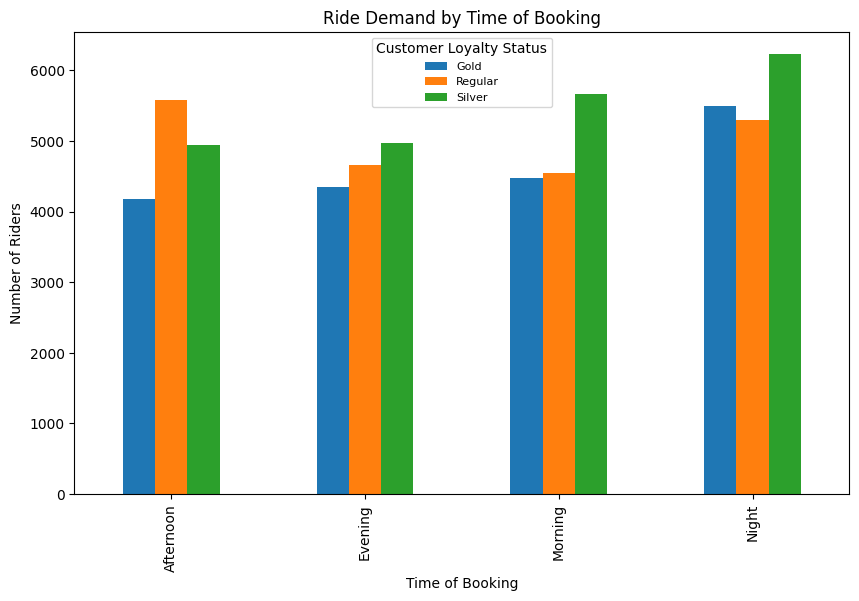

In [11]:
ride_demand_by_time.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Time of Booking')
plt.ylabel('Number of Riders')
plt.title('Ride Demand by Time of Booking')
plt.legend(title='Customer Loyalty Status', prop={'size': 8}, loc='upper center')
plt.show()

**Vehicle Type Booked For Each Location Category**

In [12]:
vehicle_counts_by_location = data.groupby(['Location_Category', 'Vehicle_Type'])['Vehicle_Type'].count().unstack()
print(" Number of Vehicle_Type Booked at Each Location_Category:\n", vehicle_counts_by_location)

 Number of Vehicle_Type Booked at Each Location_Category:
 Vehicle_Type       Economy  Premium
Location_Category                  
Rural                  153      179
Suburban               158      164
Urban                  167      179


**Analysing Previous Ride Cost with the data**

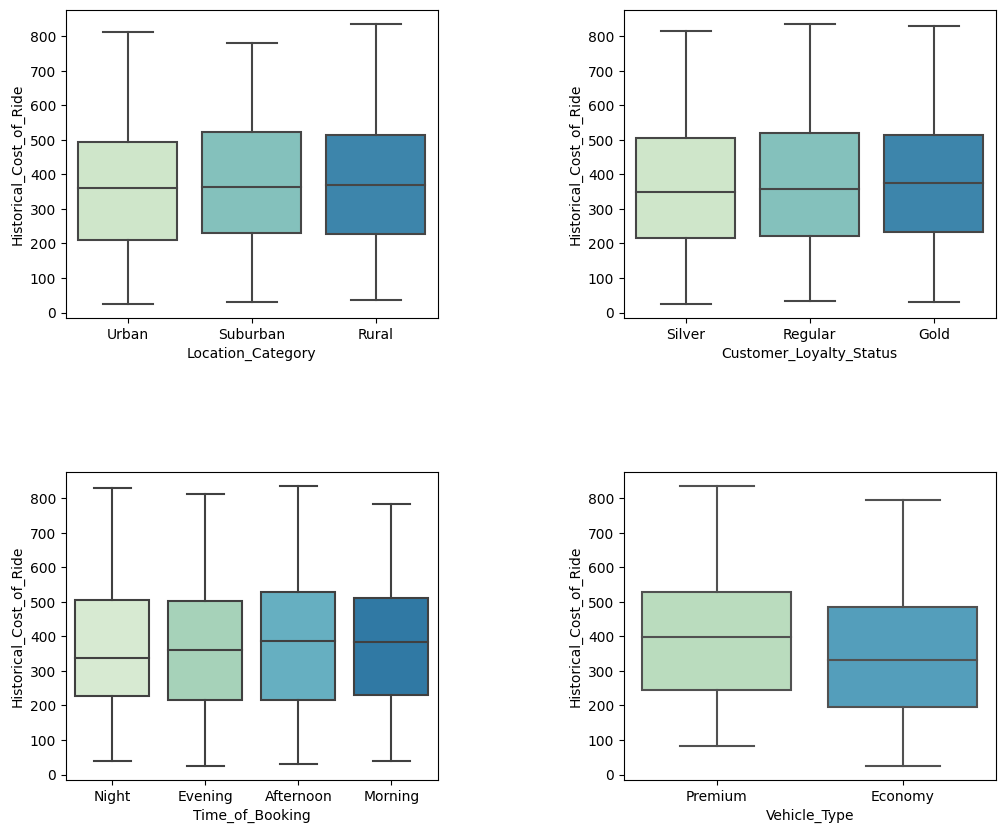

In [13]:
cat = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
plt.figure(figsize=(12,10))
for i, c in enumerate(cat, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=data['Historical_Cost_of_Ride'], x=data[c],  palette='GnBu')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

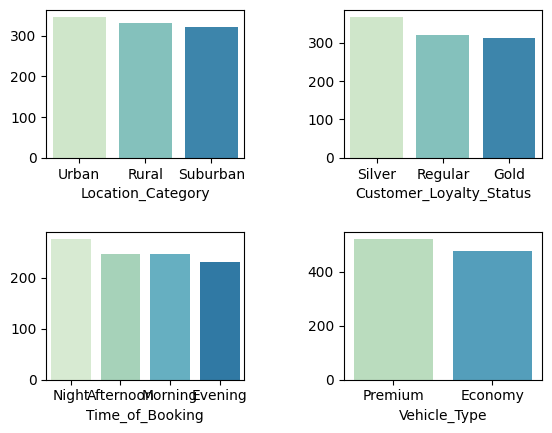

In [14]:
for i, c in enumerate(cat, 1):
        plt.subplot(2,2,i)
        c_counts = data[c].value_counts()
        
        sns.barplot(x=c_counts.index, y=c_counts.values, palette='GnBu')
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

**Conclusion**
1. Price fo premium and economy is same
2. Gold and regular customer pays almost same
3. pay of urban and rural is same (High Price for rural as well)
4. Afternoon rides are more expensive than evening

People prefer silver subscription than gold or regular
The driver to Rider Ratio is low there are approx 2 riders per driver 

In [15]:
data.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object